# Tutorial on pygsfit_cp usage

## step1: create a pygsfit_cp object with EOVSA image cube and the path to save the fitting results files.

In [1]:
#skip tag
#%matplotlib widget
%matplotlib inline
# When exporting this notebook to a .py file, use "#skip tag" to determine which cells are about to be exported.

In [8]:
#init single
from pygsfit_cp import *
import os
import pkg_resources
package_path = pkg_resources.resource_filename('pygsfit_cp', '')
os.chdir(package_path)
gs = pygsfit_cp(filename='/Users/walterwei/Downloads/20220511/eovsa/slfcal/images_slfcaled/slf_final_XX_t21_allbd.fits', out_dir='/Users/walterwei/Downloads/20220511/gsfit_test', fit_fov=[[920,-270],[940,-250]])
#gs = pygsfit_cp()
#gs = pygsfit_cp(filename='/Users/walterwei/Downloads/20220511/eovsa/slfcal/images_slfcaled/slf_final_XX_t21_allbd.fits', out_dir='/Users/walterwei/Downloads/20220511/gsfit_test')
print('The EOVSA image cube is loaded, which is in size of {0}(freqs) * {1}pix * {2}pix'.format(*gs.flux_data.shape))

The EOVSA image cube is loaded, which is in size of 50(freqs) * 256pix * 256pix


## step2 （Optional）: 
### read the documentation of input arrays then adjust the input arrays

In [3]:
#skip tag
#read the documentation of 'ninput', 'rinput', and 'initial_parguess' (Only these 3 files at this moment)
gs.documentation('ninput')
gs.documentation('rinput')
gs.documentation('initial_parguess')

       Nparms;           7              ; ;user ;Number of fit Parms
 Angular Code;           0             ; ;user ;0L for PK, 1L for FK
         Npix;           1     ; ;data ;Number of pixels sent to dll
        Nfreqst;          24  ; ;data ;Number of frequencies in the sp
 Fitting Mode;           1  ; ;user ;Case of the fit: I:1, L&R:2, I&
  Stokes Data;           1  ; ;data ;Case of the data: I:1, L&R:2, I

   SIMPLEX Step;   0.170       ;   ;user                           ;SIMPLEX Step
    SIMPLEX EPS;   0.100E-05   ;   ;user                       ;SIMPLEX accuracy
 Flux Threshold;    1.00        ;sfu*GHz     ; user ;Flux threshold to be fitted
     Pixel Area;    4.00       ;arcsec^2    ;data ;Number of pixels along y axes
      LOS Depth;    8.00        ;arcsec               ;user ;LOS depth (assumed)
           ;   0.150E-01  ;MeV ;user            ;Min energy in PLW (assumed)

      n_nth;    1.00    ;   0.100E-03;   0.200E+04;   1d7 cm^-3                    ;Non-thermal dens

### adjust the input arrays as needed.

In [9]:
gs.ninput = np.array([6, 0, 1, 30, 1, 1], dtype='int32') #Nparms, Angular_mode,Npix, Nfreq(will be replaced) fitting mode, stokes
gs.rinput = np.array([0.17, 1e-6, 1.0, 4.0, 8.0, 0.015], dtype='float64')  # real_input
gs.initial_parguess = np.array([ # *Value, *lower boundary * upper boundary
                [10.0, 0.0001, 2000.0], #n_nth;    1d7 cm^-3
                [1.0, 0.01, 10.0], #B;    1d2G
                [60.0, 22.0, 87.0], #theta;    deg
                [10.0, 0.01, 600.0], #n_th;    1d9 cm^-3
                [3.5, 1.6, 10.0], #Delta;    No
                [5.0, 0.1, 10.0], #E_max;    MeV
                [10.0, 1.5, 60.0], #T_e;    MK
            ], dtype=np.float64)

## Step 3: 
### Adjust the ROI(region of interested) and the related parameters
### Display the default setting: 
- background_xyrange = [[0.15,0.75],[0.25,0.85]] (RMS region in percentage of x and y range)
- integrated_threshold_sfu = 1 (Threshold on the integrated flux density in one pixel)
- rms_factor = 4 (The weight of RMS in the uncertainty calculation)

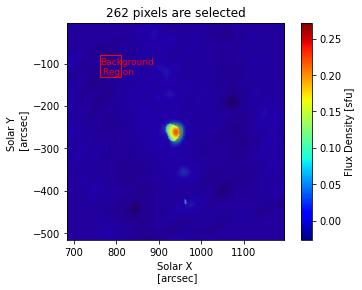

In [5]:
#skip tag
gs.plot_threshold_mask_rms(tar_freq_ghz=5.0) # tar_freq_ghz: Displayed frequency in GHz

### adjust the setting:

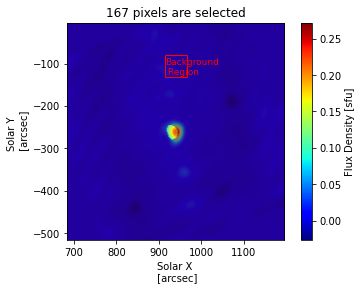

In [7]:
#skip tag
gs.update_flux_threshold_mask(threshold=2.0)
gs.background_xyrange = [[0.45,0.75],[0.55,0.85]]
gs.plot_threshold_mask_rms(tar_freq_ghz=5.0)

## step 4: 
### Do fitting! There are 2 options:
- single pixel mode
- batch mode

### Single Pixel Mode: you can provide the coord of interest in Solar XY or Pixel

Current fitting range is 3000000000.0 - 14000000000.0 Hz
Long inputs are:  [ 6  0  1 35  1  1]
Real inputs are:  [1.7e-01 1.0e-06 1.0e+00 4.0e+00 8.0e+00 1.5e-02]
Params(ranges) are:  [[1.0e+01 1.0e-04 2.0e+03]
 [1.0e+00 1.0e-02 1.0e+01]
 [6.0e+01 2.2e+01 8.7e+01]
 [1.0e+01 1.0e-02 6.0e+02]
 [3.5e+00 1.6e+00 1.0e+01]
 [5.0e+00 1.0e-01 1.0e+01]
 [1.0e+01 1.5e+00 6.0e+01]]
1 pixels to be fitted
will be fitted in plotting (single pixel) mode


Do you want to continue? Enter 'y' for Yes or 'n' for No:  y


Continuing...


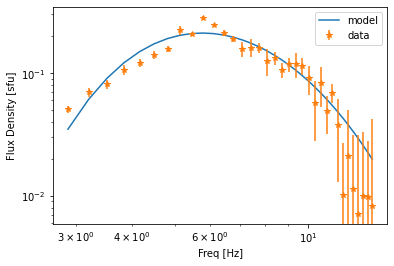

1

In [18]:
#skip tag
gs.start_freq = 3.e9
gs.end_freq = 14.e9
#gs.do_fit(mode='single', inp_coord=[9,-261])
gs.do_fit(mode='single', inp_coord=[127, 122], world=False)#inp_coord is always in x(122),y(152) order. 

### batch Mode: create multiple tasks(all the unmasked pixels), the results will be saved as pickles (task_***.p) in gs.out_dir, and will not be displayed.

In [4]:
#gs.out_dir = '/Dummy/abc/123/fake_dir/' # define a out_dir if you didn't do it during the initilization. 
#gs.update_flux_threshold_mask(threshold=6)
gs.start_freq = 3.3e9
gs.end_freq = 14.e9
gs.do_fit(mode='batch')

Current fitting range is 3300000000.0 - 14000000000.0 Hz
Long inputs are:  [ 7  0  1 34  1  1]
Real inputs are:  [1.7e-01 1.0e-06 1.0e+00 4.0e+00 8.0e+00 1.5e-02]
Params(ranges) are:  [[1.0e+01 1.0e-04 2.0e+03]
 [4.0e+00 1.0e-02 3.0e+01]
 [6.0e+01 2.2e+01 8.7e+01]
 [1.0e+01 1.0e-02 6.0e+02]
 [4.5e+00 1.6e+00 1.0e+01]
 [5.0e+00 1.0e-01 1.0e+01]
 [5.0e+00 1.5e+00 6.0e+01]]
100 pixels to be fitted
will be fitted in plotting (single pixel) mode


Do you want to continue? Enter 'y' for Yes or 'n' for No:  y


Continuing...


1

### Export all the cells without "#skip tag" to a python script (Note that the file name of the current notebook is manually defined.)

In [7]:
#skip tag
import json
notebook_path = os.path.join(os.getcwd(), 'Tutorial.ipynb')
pyfile_path = os.path.join(gs.out_dir, 'exported_notebook_cells.py')
with open(notebook_path, 'r') as nbfile:
    notebook = json.load(nbfile)
with open(pyfile_path, 'w') as pyfile:
    for cell in notebook['cells']:
        if cell['cell_type'] == 'code' and '#skip tag\n' not in cell['source'] and '#init multiple\n' not in cell['source']:
            # Write the cell content to file, excluding '#skip tag'
            pyfile.write(''.join(cell['source']) + '\n\n')
print(pyfile_path, ' is saved.')

/Users/walterwei/Downloads/20220511/gsfit_test/exported_notebook_cells.py  is saved.


In [2]:
#init multiple
from pygsfit_cp import *
import os
import pkg_resources
from pygsfit_cp_utils import *
package_path = pkg_resources.resource_filename('pygsfit_cp', '')
os.chdir(package_path)
fit_fov = [[925,-265],[935,-255]]
out_dir='/Users/walterwei/Downloads/20220511/gsfit_test'
eovsa_map_cubes = makelist(tdir = '/Users/walterwei/Downloads/20220511/gsfit_test/fitsfile_test/', keyword1='.fits')
for emi, ceomap in enumerate(eovsa_map_cubes):
    gs = pygsfit_cp(filename=ceomap, out_dir=out_dir, fit_fov=[[920,-270],[940,-250]])

### If you want to fit multiple time frame with identical parameters:
- export the script by running the following cell
- run the exported script

In [4]:
#skip tag
import os
import json

# Define paths
notebook_path = os.path.join(os.getcwd(), 'Tutorial.ipynb')
pyfile_path = os.path.join(gs.out_dir, 'multiple_time_exported_notebook_cells.py')
exclude_tags = {'#skip tag\n', '#init multiple\n', '#init single\n'}
# Load the notebook
with open(notebook_path, 'r') as nbfile:
    notebook = json.load(nbfile)
# Open the output Python file
with open(pyfile_path, 'w') as pyfile:    
    for cell in notebook['cells']:
        if cell['cell_type'] == 'code' and '#init multiple\n' in cell['source']:
            pyfile.write(''.join(cell['source']) + '\n\n')
            break    
    for cell in notebook['cells']:
        if cell['cell_type'] == 'code' and not any(tag in cell['source'] for tag in exclude_tags):
            indented_source = ''.join('    ' + line for line in cell['source'])
            pyfile.write(indented_source + '\n\n')
print(pyfile_path, ' is saved.')

/Users/walterwei/Downloads/20220511/gsfit_test/multiple_time_exported_notebook_cells.py  is saved.


### export the fitting results to gsfitview in IDL

In [3]:
from results_convertor import create_params_map
res_list = makelist(tdir='/Users/walterwei/Downloads/20220511/gsfit_test/', keyword1='allbd.h5')
for i, cres in enumerate(res_list):
    create_params_map(cres)